## Task 1: Custom CNN Implementation for Image Classification (6 marks)‬
#### 1)Dataset Preparation‬:‬
* Load CIFAR-10 and split into training, validation, and test sets.‬
* Apply data augmentation (e.g., random horizontal flip).‬

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # each of size (32, 32, 3)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)


# create instance of the ImageDataGenerator class
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)


train_datagen.fit(x_train) # apply data augmentation


133857280/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

#### 2)Model Design‬:‬
* Define a CNN with the following layers:‬
    * 2 convolutional layers (number of kernels = 64, kernel size = 3x3, stride = 1,‬ padding = 1).‬
    * 2 max-pooling layers (kernel size = 2x2).‬
    * 1 fully connected layer (hidden layer) with (units = 128, dropout = 0.5).‬
    * Model architecture will be conv layer > pooling > conv layer > pooling > dense‬ layer > output layer‬
    * Use ReLU activation and batch normalization after each convolutional layer.‬

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) #64 3x3 filters
model.add(layers.BatchNormalization())  # normalizes activations so they have a mean 0 and variance 1.
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer with rate 0.5

model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [10]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_val, y_val)
)
y_pred_base = model.predict(x_test)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc}, Test loss : {test_loss}")

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.2733 - loss: 2.0501 - val_accuracy: 0.4453 - val_loss: 1.4799
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4120 - loss: 1.5937 - val_accuracy: 0.5267 - val_loss: 1.3233
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4822 - loss: 1.4356 - val_accuracy: 0.5545 - val_loss: 1.3390
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5301 - loss: 1.3157 - val_accuracy: 0.5928 - val_loss: 1.1324
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5679 - loss: 1.2379 - val_accuracy: 0.6473 - val_loss: 1.0142
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5837 - loss: 1.1781 - val_accuracy: 0.5896 - val_loss: 1.1519
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6009 - loss: 1.1343 - val_accuracy: 0.6502 - val_loss: 1.0255
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6205 - loss: 1.0885 - 

#### 3)Hyperparameter tuning:‬
* Fine-tune the above model to find the optimal parameters that give the best performance.‬
    * Try with different numbers of‬ convolutional layers/kernels/max pooling‬ layers/dense layers/dense layer units‬
    * Try changing the activation functions/dropout rate/optimizer‬

In [11]:
tuned_model_1 = models.Sequential()

tuned_model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
tuned_model_1.add(layers.BatchNormalization())
tuned_model_1.add(layers.MaxPooling2D((2, 2)))

tuned_model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
tuned_model_1.add(layers.BatchNormalization())
tuned_model_1.add(layers.MaxPooling2D((2, 2)))

tuned_model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
tuned_model_1.add(layers.BatchNormalization())
tuned_model_1.add(layers.MaxPooling2D((2, 2)))

tuned_model_1.add(layers.Flatten())

tuned_model_1.add(layers.Dense(128, activation='relu'))
tuned_model_1.add(layers.Dropout(0.3))

tuned_model_1.add(layers.Dense(10, activation='softmax'))

tuned_model_1.compile(optimizer='sgd',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])





#### 4)Training‬:‬
* Train the model using the models before and after hyper-parameter tuning.‬
* Report training/validation accuracy and loss curves.‬


In [12]:
history_tuned = tuned_model_1.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_val, y_val)
)

test_loss_tuned_1, test_acc_tuned_1 = tuned_model_1.evaluate(x_test, y_test, verbose=1)
y_pred_1 = tuned_model_1.predict(x_test)
print(f"Test accuracy: {test_acc_tuned_1}, Test loss : {test_loss_tuned_1}")

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.3478 - loss: 1.8905 - val_accuracy: 0.3819 - val_loss: 1.8323
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.4921 - loss: 1.3981 - val_accuracy: 0.5654 - val_loss: 1.2211
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5497 - loss: 1.2505 - val_accuracy: 0.5968 - val_loss: 1.1350
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5881 - loss: 1.1508 - val_accuracy: 0.5706 - val_loss: 1.2390
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6120 - loss: 1.0956 - val_accuracy: 0.5659 - val_loss: 1.2486
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6350 - loss: 1.0282 - val_accuracy: 0.6209 - val_loss: 1.0787
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6528 - loss: 0.9861 - val_accuracy: 0.6576 - val_loss: 0.9933
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6649 - loss: 0.9546 - 

In [13]:
# Second tuned model with 4 convo layer and adam optimiser
tuned_model_2 = models.Sequential()

tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
tuned_model_2.add(layers.MaxPooling2D((2, 2)))

tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
tuned_model_2.add(layers.BatchNormalization())

tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
tuned_model_2.add(layers.BatchNormalization())
tuned_model_2.add(layers.MaxPooling2D((2, 2)))


tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
tuned_model_2.add(layers.BatchNormalization())
tuned_model_2.add(layers.MaxPooling2D((2, 2)))

tuned_model_2.add(layers.Flatten())

tuned_model_2.add(layers.Dense(128, activation='sigmoid'))
tuned_model_2.add(layers.Dropout(0.3))

# Output layer with softmax activation for multi-class classification
tuned_model_2.add(layers.Dense(10, activation='softmax'))

tuned_model_2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])



In [15]:
# Train the tuned model
history_tuned = tuned_model_2.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_val, y_val)
)
y_pred_2 = tuned_model_2.predict(x_test)

# Evaluate the model on the test set
test_loss_tuned_2, test_acc_tuned_2 = tuned_model_2.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc_tuned_2}, test loss: {test_loss_tuned_2}")

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.3181 - loss: 1.8806 - val_accuracy: 0.2739 - val_loss: 2.1755
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.5036 - loss: 1.3749 - val_accuracy: 0.2393 - val_loss: 2.9340
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5788 - loss: 1.1884 - val_accuracy: 0.2225 - val_loss: 2.4391
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6174 - loss: 1.0832 - val_accuracy: 0.4427 - val_loss: 1.6677
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6448 - loss: 1.0097 - val_accuracy: 0.4086 - val_loss: 1.8625
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6640 - loss: 0.9621 - val_accuracy: 0.4908 - val_loss: 1.4226
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6795 - loss: 0.9189 - val_accuracy: 0.6116 - val_loss: 1.1110
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.6914 - loss: 0.8928 - 

#### 5)Evaluation‬:‬
* Compute test accuracy.‬
* Compare the performance between models before and after tuning.‬
* Plot confusion matrix and classification report.‬

Test accuracy model 2 : 0.5401999950408936, test loss 1.3414815664291382
Test accuracy model 1: 0.71670001745224, test loss 0.8242648243904114
Test accuracy base model: 0.7117000222206116, test loss 0.8452616930007935
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


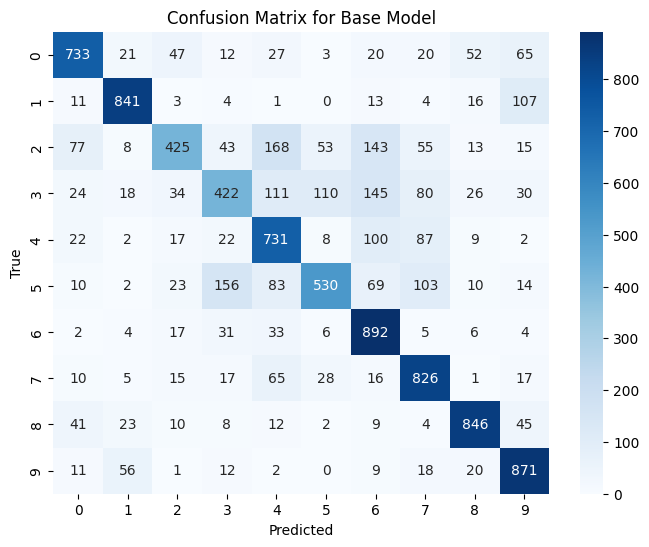

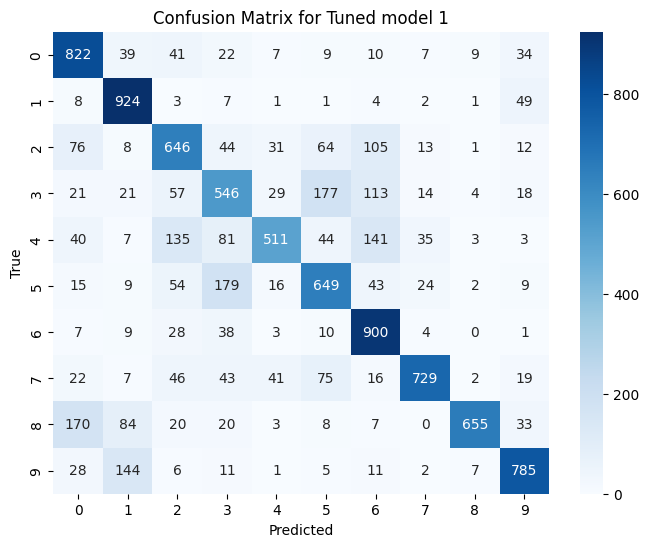

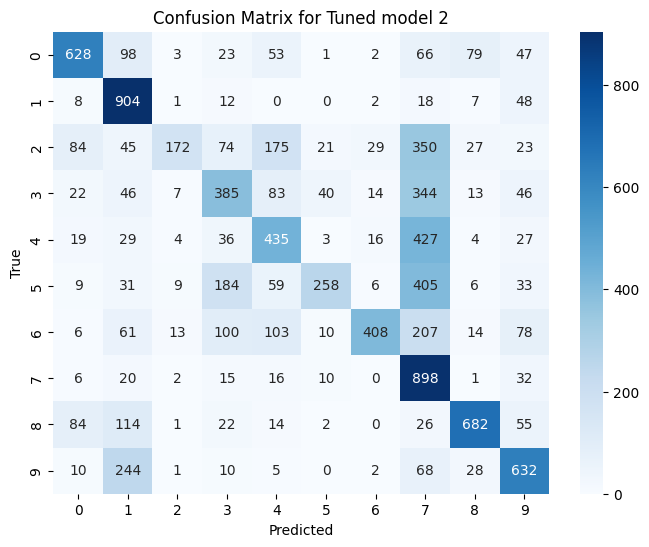

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# 1) Evaluate both the base and tuned models on the test set
print(f"Test accuracy model 2 : {test_acc_tuned_2}, test loss {test_loss_tuned_2}")
print(f"Test accuracy model 1: {test_acc_tuned_1}, test loss {test_loss_tuned_1}")
print(f"Test accuracy base model: {test_acc}, test loss {test_loss}")

y_pred_base = np.argmax(model.predict(x_test), axis=1)
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Base Model')
plt.xlabel('Predicted')
plt.ylabel('True')

y_pred_1 = np.argmax(tuned_model_1.predict(x_test), axis=1)
conf_matrix_tune_1 = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tune_1, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Tuned model 1')
plt.xlabel('Predicted')
plt.ylabel('True')

y_pred_2 = np.argmax(tuned_model_2.predict(x_test), axis=1)
conf_matrix_tune_2 = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tune_2, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Tuned model 2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Task 2: Transfer Learning with Pre-trained Architectures (2 marks)‬
#### 1)Data Preparation‬:‬
* Load the dataset and split into train/validation/test sets.‬
* Resize images to match the input size of the pre-trained model.‬


In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)


#### 2)Model Setup‬:‬
* Load a pre-trained model from keras.‬
* Replace the final fully connected layer accordingly.‬
* Freeze all layers except the final classification layer.‬
#### 3)Training‬:‬
* Train only the unfrozen layers.‬
‬

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the pre-trained VGG16 model without the fully connected layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last classification layer
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of the pre-trained VGG16 base
model = models.Sequential()
model.add(layers.Resizing(224, 224))  # Resize to 224x224
# Add the pre-trained VGG16 base
model.add(base_model)

# Add global average pooling
model.add(layers.GlobalAveragePooling2D())

# Add a fully connected layer for classification
model.add(layers.Dense(128, activation='relu'))

# Add dropout for regularization
model.add(layers.Dropout(0.5))

# Output layer with 10 units (for 10 CIFAR-10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train,y_train,
    epochs=15,
    validation_data=(x_val, y_val)
)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 273s 217ms/step - accuracy: 0.2825 - loss: 1.9802 - val_accuracy: 0.5006 - val_loss: 1.4843
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 344s 235ms/step - accuracy: 0.4493 - loss: 1.5465 - val_accuracy: 0.5523 - val_loss: 1.3353
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 235ms/step - accuracy: 0.4899 - loss: 1.4274 - val_accuracy: 0.5617 - val_loss: 1.2600
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 235ms/step - accuracy: 0.5185 - loss: 1.3546 - val_accuracy: 0.5842 - val_loss: 1.2028
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 235ms/step - accuracy: 0.5310 - loss: 1.3263 - val_accuracy: 0.5921 - val_loss: 1.1825
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 235ms/step - accuracy: 0.5467 - loss: 1.2780 - val_accuracy: 0.5998 - val_loss: 1.1314
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 235ms/step - accuracy: 0.5554 - loss: 1.2698 - val_accuracy: 0.6033 - val_loss: 1.1441
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 235ms/step - ac

#### 4)Analysis‬:‬
* Compare test accuracy with your custom CNN from Task 1.‬
* Discuss why the pre-trained model performs better/worse.

In [2]:
# Evaluate the pre-trained model on the test set
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print(f"Pre-trained Model Test Accuracy: {test_acc:.4f}")

# Now evaluate the custom CNN model (assuming you have trained it earlier)
test_loss_base, test_acc_base = tuned_model_1.evaluate(x_test,y_test, verbose=2)
print(f"Custom CNN Model Test Accuracy: {test_acc_base:.4f}")


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'model' is not defined

## Task 3: Visualizing Model Decisions with Grad-CAM (2 marks)‬
#### 1)Grad-CAM Implementation‬:‬
* Extract feature maps from the last convolutional layer of your custom CNN.‬
* Compute gradients of the predicted class score with respect to these feature maps.‬
* Generate a heatmap by combining the feature maps and gradients.‬
#### 2)Visualization‬:‬
* Overlay the heatmap on 5 test images from the given dataset.‬
* Compare regions highlighted by Grad-CAM with the actual objects in the images.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model

# Extract feature maps from the last convolutional layer
last_conv_layer = tuned_model_1.get_layer('conv2d_6')  # The last convolutional layer in your model

# Create a model to get the feature maps and predictions (including Gradients)
grad_model = Model(inputs=tuned_model_1.input, outputs=[last_conv_layer.output, tuned_model_1.output])

# Compute the gradients of the predicted class score w.r.t the feature maps
def compute_gradcam(input_image, class_index):
    with tf.GradientTape() as tape:
        # Watch the image for gradient computation
        tape.watch(input_image)

        # Get the feature maps and the model predictions
        feature_maps, predictions = grad_model(input_image)

        # Get the class score (logits)
        class_score = predictions[:, class_index]

    # Compute the gradients of the class score w.r.t the feature maps
    grads = tape.gradient(class_score, feature_maps)
    return feature_maps, grads

# Process the gradients to create the heatmap
def generate_gradcam_heatmap(feature_maps, grads):
    # Compute the weights of each feature map by averaging the gradients
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))  # Mean over width, height, and channels

    # Compute the weighted sum of feature maps
    grad_cam_output = tf.reduce_sum(tf.multiply(weights, feature_maps), axis=-1)

    # Apply ReLU to only keep positive activations
    grad_cam_output = tf.maximum(grad_cam_output, 0)

    # Normalize the heatmap
    grad_cam_output = grad_cam_output / tf.reduce_max(grad_cam_output)

    return grad_cam_output

# Visualize the heatmap on top of the image
def overlay_heatmap(image, heatmap):
    # Resize the heatmap to the same size as the image
    heatmap = tf.image.resize(heatmap, (image.shape[1], image.shape[2]))
    heatmap = heatmap.numpy()

    # Apply a colormap to the heatmap
    heatmap = plt.cm.jet(heatmap)[:, :, :3]  # Convert to RGB
    heatmap = tf.convert_to_tensor(heatmap)

    # Overlay the heatmap on top of the image
    overlayed_image = 0.5 * image + 0.5 * heatmap
    return overlayed_image

# Generate and plot Grad-CAM for 5 test images
def generate_and_plot_gradcam(test_images, test_labels, num_images=5):
    for i in range(num_images):
        image = tf.convert_to_tensor(test_images[i:i+1])  # Add batch dimension
        label = test_labels[i:i+1]
        class_index = np.argmax(label)  # Get the predicted class index

        # Compute Grad-CAM
        feature_maps, grads = compute_gradcam(image, class_index)
        heatmap = generate_gradcam_heatmap(feature_maps[0], grads[0])

        # Get the original image
        original_image = test_images[i]

        # Overlay the heatmap on the original image
        overlayed_image = overlay_heatmap(original_image, heatmap)

        # Plot the original image and the Grad-CAM heatmap
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title(f'Original Image {i+1}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(overlayed_image)
        plt.title(f'Grad-CAM {i+1}')
        plt.axis('off')

        plt.show()

# Test with the first 5 images from your test set (you can modify this as needed)
generate_and_plot_gradcam(x_test, y_test, num_images=5)


NameError: name 'tuned_model_1' is not defined